In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, message="A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.")

In [4]:
df=pd.read_csv('/kaggle/input/luke-hair-loss-dataset/Luke_hair_loss_documentation.csv')
df.head()

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,Y,3.0,NaN,1
1,2/01/2021,Few,0,Low,0,3,NaN,Low,Pantene,No,N,1.0,NaN,1
2,3/01/2021,Medium,3,Low,1,0,NaN,Low,Pantene,Yes,Y,2.0,NaN,2
3,4/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,N,3.0,NaN,3
4,5/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,Y,1.0,NaN,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    400 non-null    object 
 1   hair_loss               400 non-null    object 
 2   stay_up_late            400 non-null    int64  
 3   pressure_level          400 non-null    object 
 4   coffee_consumed         400 non-null    int64  
 5   brain_working_duration  400 non-null    int64  
 6   school_assesssment      95 non-null     object 
 7   stress_level            400 non-null    object 
 8   shampoo_brand           400 non-null    object 
 9   swimming                400 non-null    object 
 10  hair_washing            400 non-null    object 
 11  hair_grease             396 non-null    float64
 12  dandruff                111 non-null    object 
 13  libido                  400 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory 

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.drop(columns=['date','school_assesssment','shampoo_brand','coffee_consumed','brain_working_duration','stay_up_late','swimming','hair_washing','libido'],inplace=True)
df.head()

,hair_loss,pressure_level,stress_level,hair_grease,dandruff
0,Few,Low,Low,3.0,NaN
1,Few,Low,Low,1.0,NaN
2,Medium,Low,Low,2.0,NaN
3,Few,Low,Low,3.0,NaN
4,Few,Low,Low,1.0,NaN


In [8]:
df.shape

(400, 5)

In [9]:
df['hair_loss'].replace("Few", 0, inplace=True)
df['hair_loss'].replace("Medium", 0, inplace=True)
df['hair_loss'].replace("Many", 1, inplace=True)
df['hair_loss'].replace("A lot", 1, inplace=True)

df['dandruff'].replace("Few", 1, inplace=True)
df['dandruff'].replace("Many", 2, inplace=True)

df.replace('Low', 0, inplace=True)
df.replace('Medium', 1, inplace=True)
df.replace('High', 2, inplace=True)
df.replace('Very High', 3, inplace=True)

df.head()

/tmp/ipykernel_30/1781390813.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['hair_loss'].replace("A lot", 1, inplace=True)
/tmp/ipykernel_30/1781390813.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dandruff'].replace("Many", 2, inplace=True)
/tmp/ipykernel_30/1781390813.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fu

,hair_loss,pressure_level,stress_level,hair_grease,dandruff
0,0,0,0,3.0,NaN
1,0,0,0,1.0,NaN
2,0,0,0,2.0,NaN
3,0,0,0,3.0,NaN
4,0,0,0,1.0,NaN


In [10]:
for i in df.columns:
    print(df[i].unique())

[0 1]
[0 1 2 3]
[0 1 2 3]
[ 3.  1.  2.  4.  5. nan]
[nan  1.  2.]


In [11]:
df.isnull().sum()

hair_loss           0
pressure_level      0
stress_level        0
hair_grease         4
dandruff          289
dtype: int64

In [12]:
mode_value = df['hair_grease'].mode()[0]
df['hair_grease'].fillna(mode_value, inplace=True)
mode_value1 = df['dandruff'].mode()[0]
df['dandruff'].fillna(mode_value1, inplace=True)

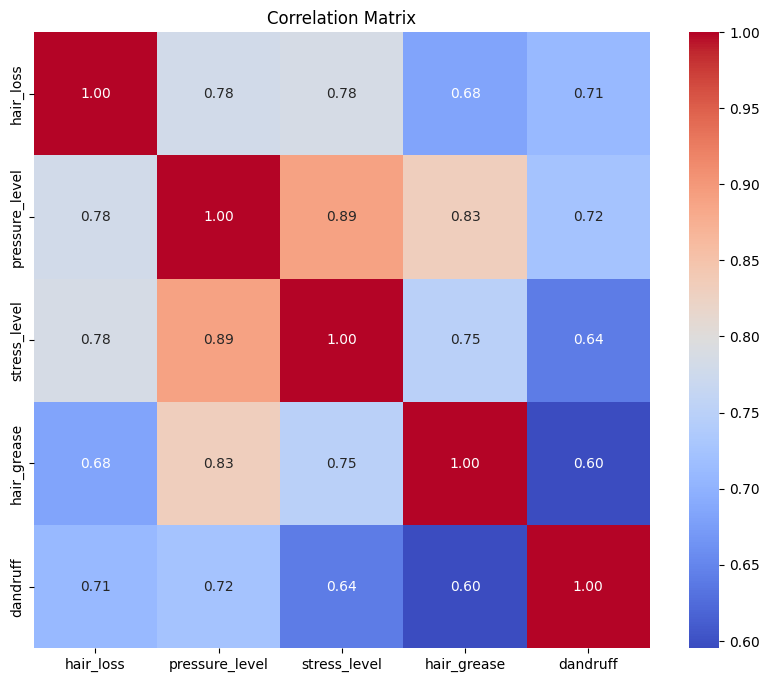

In [13]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

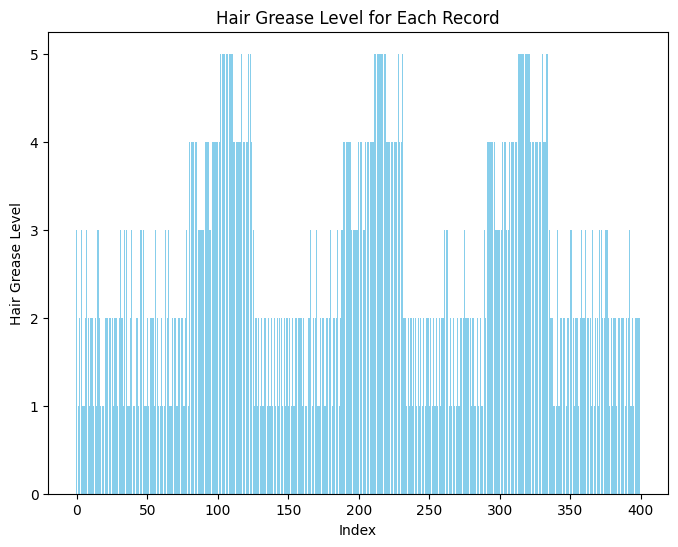

In [25]:
plt.figure(figsize=(8, 6))
plt.bar(df.index, df['hair_grease'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Hair Grease Level')
plt.title('Hair Grease Level for Each Record')
plt.show()

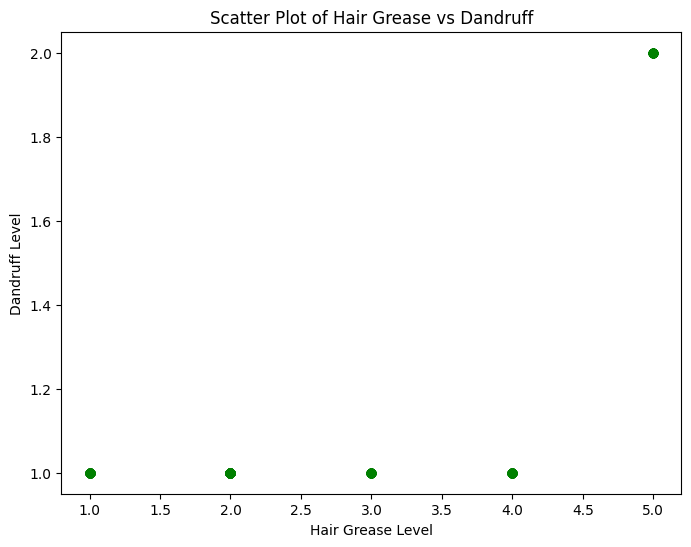

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df['hair_grease'], df['dandruff'], color='green')
plt.xlabel('Hair Grease Level')
plt.ylabel('Dandruff Level')
plt.title('Scatter Plot of Hair Grease vs Dandruff')
plt.show()

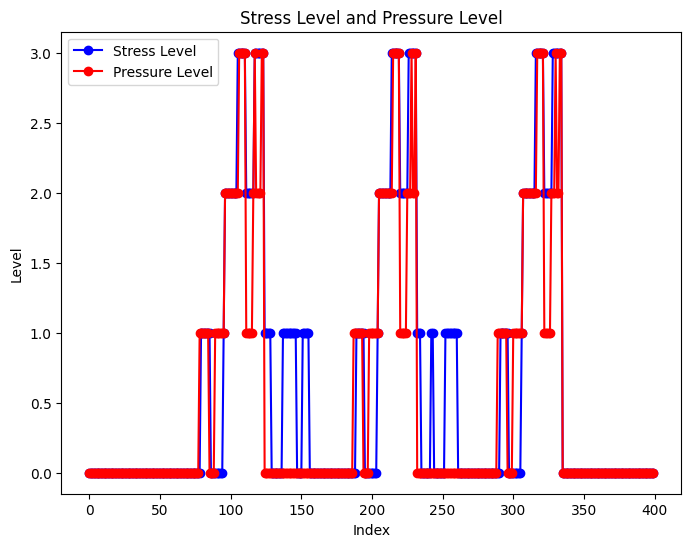

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['stress_level'], marker='o', label='Stress Level', color='blue')
plt.plot(df.index, df['pressure_level'], marker='o', label='Pressure Level', color='red')
plt.xlabel('Index')
plt.ylabel('Level')
plt.title('Stress Level and Pressure Level')
plt.legend()
plt.show()

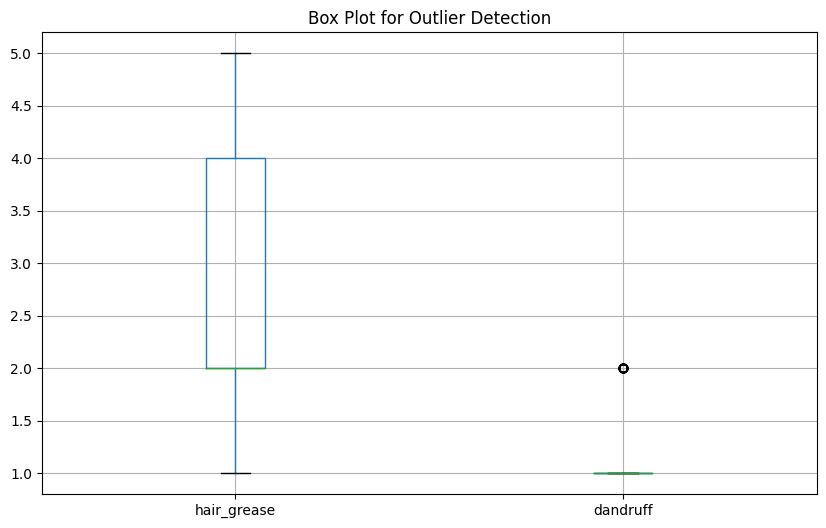

In [28]:
plt.figure(figsize=(10, 6))
df[['hair_grease', 'dandruff']].boxplot()
plt.title('Box Plot for Outlier Detection')
plt.show()

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
outliers = df[outliers_iqr.any(axis=1)]
print("Rows containing outliers :")
print(outliers)

Rows containing outliers :
     hair_loss  pressure_level  stress_level  hair_grease  dandruff
98           1               2             2          4.0       1.0
99           1               2             2          4.0       1.0
100          1               2             2          4.0       1.0
101          1               2             2          4.0       1.0
102          1               2             2          5.0       2.0
..         ...             ...           ...          ...       ...
330          1               3             3          5.0       2.0
331          1               2             3          4.0       1.0
332          1               2             3          4.0       1.0
333          1               3             3          5.0       2.0
334          1               3             3          5.0       2.0

[70 rows x 5 columns]


In [14]:
X=df.drop(columns=['hair_loss'])
y=df['hair_loss']

In [15]:
X.head()

,pressure_level,stress_level,hair_grease,dandruff
0,0,0,3.0,1.0
1,0,0,1.0,1.0
2,0,0,2.0,1.0
3,0,0,3.0,1.0
4,0,0,1.0,1.0


In [16]:
df['dandruff'].unique()

array([1., 2.])

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced',min_samples_split=15,max_features='log2',max_depth=20)
clf.fit(X_train,y_train)
y_pred1=clf.predict(X_test)
acc=accuracy_score(y_test,y_pred1)
acc

0.9125

In [20]:
y_pred_train=clf.predict(X_train)
acc1=accuracy_score(y_train,y_pred_train)
acc1

0.95

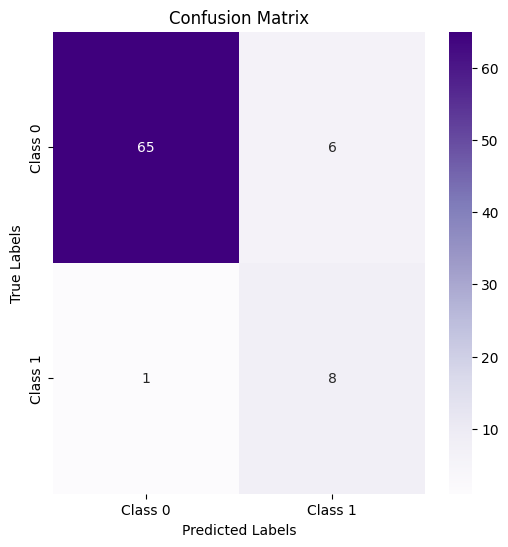

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        71
           1       0.57      0.89      0.70         9

    accuracy                           0.91        80
   macro avg       0.78      0.90      0.82        80
weighted avg       0.94      0.91      0.92        80



In [23]:
import xgboost as xgb
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_, y_train_ = smote.fit_resample(X_train, y_train)

xgb_model.fit(X_train_, y_train_)

y_pred3 = xgb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {acc}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred3))

print("Classification Report:")
print(classification_report(y_test, y_pred3))

Accuracy: 0.925
Confusion Matrix:
[[65  6]
 [ 0  9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        71
           1       0.60      1.00      0.75         9

    accuracy                           0.93        80
   macro avg       0.80      0.96      0.85        80
weighted avg       0.96      0.93      0.93        80



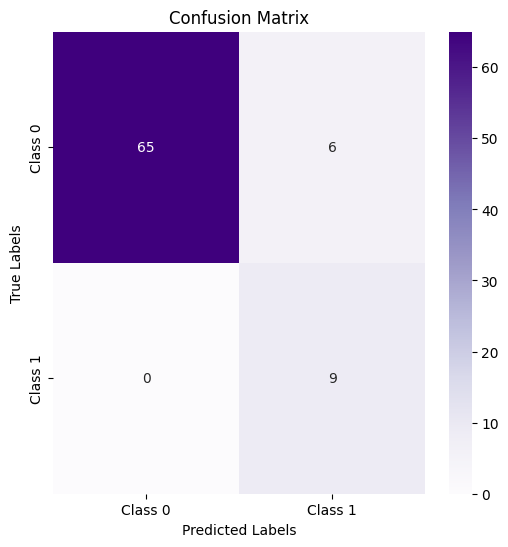

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()